(array([1, 6, 2, 1, 1, 2, 1, 2, 1]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))


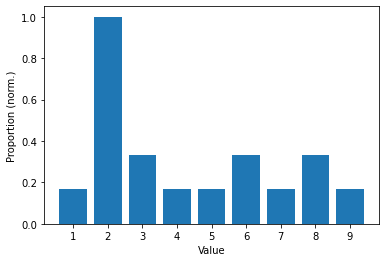

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rankdata

data = [1,2,2,2,2,2,2,3,4,5,6,7,8,9,8,6,3]

histdata = np.histogram(data,bins=np.arange(1,11))
print(histdata)

# plt.hist(data)
# plt.xlabel('Value')
# plt.ylabel('Number of appearances (count)')
# plt.show()

y,x = np.histogram(data,bins=np.arange(1,11))
yP = y/np.max(y)
# yP = y/np.sum(y)

# plt.bar(histdata[1][:-1],histdata[0])
plt.bar(x[:-1],yP)
plt.xlabel('Value')
# plt.ylabel('Number of appearances (count)')
plt.ylabel('Proportion (norm.)')
plt.xticks(np.arange(1,10))
plt.show()

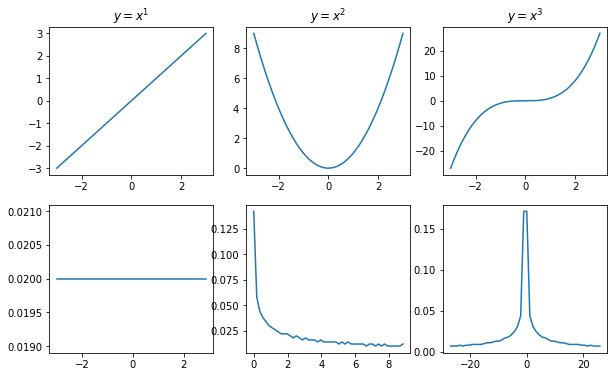

In [19]:
x = np.linspace(-3,3,1000)

fig,ax = plt.subplots(2,3)
fig.set_size_inches(10,6)

for i in range(3):
    #create the fun and its histo
    y = x**(i+1)
    h = np.histogram(y,50)
    yP = h[0]/np.sum(h[0])
    
    #plotting
    ax[0,i].plot(x,y)
    ax[0,i].set_title('$y=x^{%g}$' %(i+1))
    
    ax[1,i].plot(h[1][:-1],yP)
    
plt.show()
    

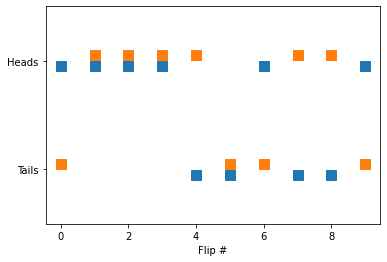

In [25]:
faircoin = .5
biascoin = .6
nTrials = 10
results = np.zeros((2,nTrials))
for i in range(0,nTrials):
    results[0,i] = np.random.rand()>faircoin
    results[1,i] = np.random.rand()>biascoin
    
plt.plot(results[0,:]-.05,'s',markersize=10,label='fair coin')
plt.plot(results[1,:]+.05,'s',markersize=10,label='bias coin')
plt.yticks([0,1],['Tails','Heads'])
plt.xlabel('Flip #')
plt.ylim([-.5,1.5])
plt.show()

In [34]:
#Pandas Module
import pandas as pd
df = pd.DataFrame(results,dtype='int',index=['fair','biased'])
df['Ave.'] = df.mean(axis=1)
df

,0,1,2,3,4,5,6,7,8,9,Ave.
fair,1,1,1,1,0,0,1,0,0,1,0.6
biased,0,1,1,1,1,0,0,1,1,0,0.6


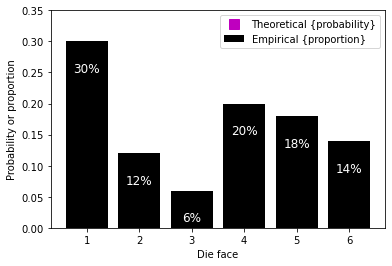

In [76]:
n = 50
outcomes = np.zeros(6)
pureprobs = np.array([2,1,1,1,1,1])
pureprobs

for i in range(n):
    #roll a 7-sided die
    dieroll = np.random.randint(0,7)
    if dieroll==6:
        dieroll = 0
    outcomes[dieroll] += 1
    
plt.bar(range(1,7),outcomes/n,color='k',label='Empirical {proportion}')
plt.plot(range(1,7),pureprobs,'ms',markersize=10,label='Theoretical {probability}')
plt.xlabel('Die face')
plt.ylabel('Probability or proportion')
plt.ylim(0,.35)
plt.legend()

for i in range(1,7):
    plt.text(i,outcomes[i-1]/n-0.05,'%s%%' %int(100*outcomes[i-1]/n) \
             ,color='w',fontsize=12,horizontalalignment='center')

plt.show()

Mean is 4.92315, std is 1.99577


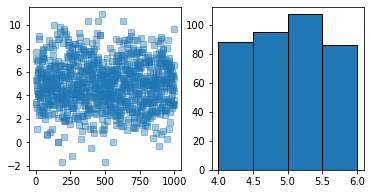

In [88]:
#LECT 158
shift = 5
stretch = 2
n = 1000
pnts = np.random.randn(n)*stretch + shift #-.5*stretch
print('Mean is %g, std is %g' %(np.mean(pnts),np.std(pnts)))

fig,ax = plt.subplots(1,2,figsize=(6,3))

ax[0].plot(pnts,'s',alpha=.4)
# ax[1].hist(pnts,500)
ax[1].hist(pnts,bins=[4,4.5,5,5.5,6],edgecolor='k')

plt.show()

Mean is 3.423, variance is 3.48407


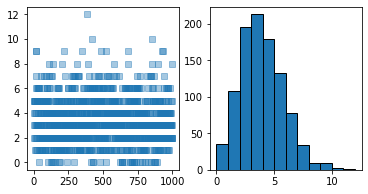

In [92]:
#LECT 158
lam = 3.4
n = 1000
pnts = np.random.poisson(lam,n)
print('Mean is %g, variance is %g' %(np.mean(pnts),np.var(pnts)))

fig,ax = plt.subplots(1,2,figsize=(6,3))
ax[0].plot(pnts,'s',alpha=.4)
ax[1].hist(pnts,bins=np.arange(0,np.max(pnts)+1),edgecolor='k')

plt.show()

[-1.54920207e-01  3.96844205e-01  6.16808760e-01 -1.67209775e-01
 -1.61675257e+00 -1.09972217e+00 -1.17024688e+00 -1.15791516e+00
  2.16911986e-01 -8.15575836e-01  8.22902778e-01 -5.03761024e-01
 -1.87806072e-01  9.08806424e-01 -1.43268523e+00 -4.53961241e-01
  3.46573590e-01 -7.39870040e-02 -1.79549594e-01  5.50637703e-01
  1.79660046e-02 -3.37618127e-01 -4.44255584e-01  5.94234309e-01
  6.39956979e-01 -9.81180492e-02  5.03761024e-01 -2.59539298e-02
  2.21098559e-01  1.08871098e+00  2.08561096e-01 -1.02638665e+00
  5.79490105e-02  1.18283453e+00 -1.26448332e+00 -1.23600162e+00
  1.29441879e+00  1.43268523e+00 -3.42089255e-01  3.92197926e-01
  9.81180492e-02 -5.72190354e-01 -1.32598037e+00  1.42676891e-01
 -3.46573590e-01 -8.08320412e-01 -6.59637715e-02 -2.06053382e+00
  5.13997361e-01 -1.64482245e+00 -9.40890445e-02 -9.00630831e-02
  9.00552666e-01  1.30998437e+00  1.39729652e-02  3.11055704e-01
 -9.51627487e-01 -5.77653816e-01  7.59391772e-01  1.67209775e-01
  4.39432163e-01  7.94017

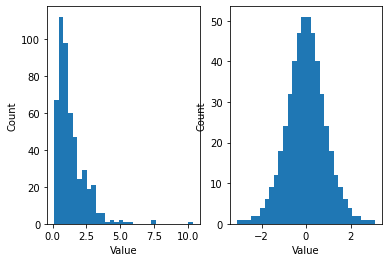

In [104]:
n = 500

orig_data = 2**np.random.randn(n)

# rank data
rank_data = rankdata(orig_data)
rank_data = np.append(rank_data,np.max(rank_data)+1)

# normalize to [-1,1]
norm_data = 2*(rank_data/np.max(rank_data))-1
norm_data = np.delete(norm_data,n)

# apply the inverse hyperbolic transform
trans_data = np.arctanh(norm_data)
print(trans_data)

fig,ax = plt.subplots(1,2)

ax[0].hist(orig_data,30)
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Count')

ax[1].hist(trans_data,30)
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Count')

plt.show()

In [97]:
rankdata([1.1,1,1.11,1000000000]) #1st largest to 4th largest

array([2., 1., 3., 4.])

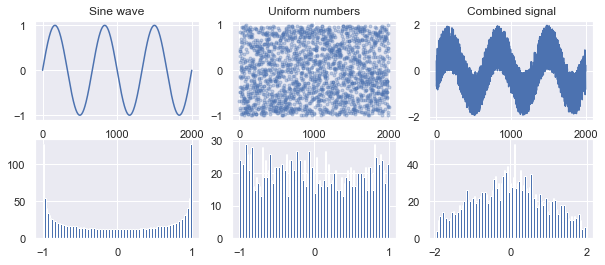

In [113]:
n = 2000

sig1 = np.sin(np.linspace(0,6*np.pi,n))
sig2 = np.random.rand(n)*2-1
# plot the individual signals and their distributions
fig,ax = plt.subplots(2,3,figsize=(10,4))

combi = sig1 + sig2

ax[0,0].plot(sig1)
ax[0,0].set_title('Sine wave')
ax[1,0].hist(sig1,100)

ax[0,1].plot(sig2,'.',alpha=.3)
ax[0,1].set_title('Uniform numbers')
ax[1,1].hist(sig2,100)

ax[0,2].plot(combi)
ax[0,2].set_title('Combined signal')
ax[1,2].hist(combi,100)

# for i in np.matrix.flatten(ax):
#     ax[0,0].set_xticks([])
#     ax[0,0].set_yticks([])

plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


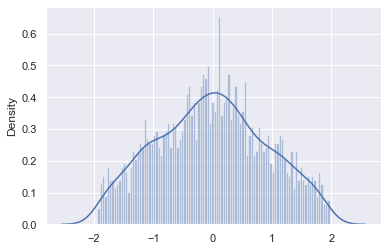

In [114]:
import seaborn as sns

sns.set()

sns.distplot(combi,100)

plt.show()

<ipython-input-123-2238de1a8f07>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x[:-1],ns,allhist,vmax=.6)#,cmap='Purples')


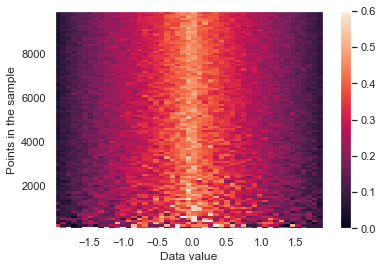

In [123]:
ns = np.arange(50,10000,100)
nbins = 50

allhist = np.zeros((len(ns),nbins))

for i in range(len(ns)):
    sig1 = np.sin(np.linspace(0,6*np.pi,ns[i]))
    sig2 = (np.random.rand(ns[i])*2-1)
    allhist[i,:],x = np.histogram(sig1+sig2,nbins,density=True)
    
plt.pcolor(x[:-1],ns,allhist,vmax=.6)#,cmap='Purples')
plt.xlabel('Data value')
plt.ylabel('Points in the sample')
plt.colorbar()
plt.show()


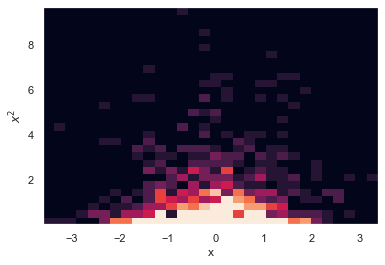

In [126]:
n = 1000

x = np.random.randn(n)
y = np.random.randn(n)**2

plt.hist2d(x,y,30,vmax=10)
plt.xlabel('x')
plt.ylabel('$x^2$')
plt.show()



/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


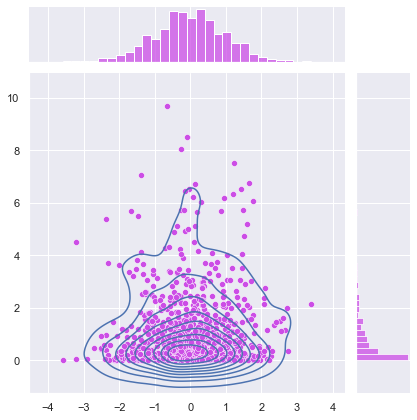

In [132]:
# LECT 162- JOINT PROBABILITY DISTRIBUTION:
sns.set()

sns.jointplot(x,y,kind='scatter',color=[.8,.3,.9]).plot_joint(sns.kdeplot)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


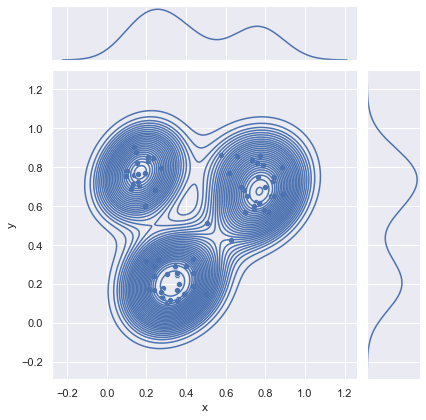

In [143]:
data = pd.read_csv('data.csv',header=None,names=['x','y'])
data

sns.jointplot(data['x'],data['y'],kind='kde',levels=30).plot_joint(sns.scatterplot)
plt.show()